<a href="https://colab.research.google.com/github/DODN-TINT/Simple-ImageClassifier/blob/main/Intro_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50

# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet50.ResNet50()

# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("sample_data/bay.jpg", target_size=(224, 224))








In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

array([[[243., 243.],
        [244., 244.]],

       [[244., 244.],
        [245., 245.]]], dtype=float32)

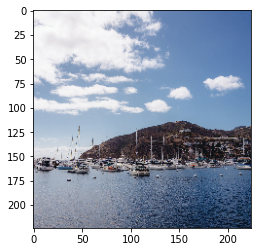

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
# Convert the image to a numpy array
x = image.img_to_array(img)

x[0:2,0:2,0:2]

## Step through to understand the steps for image classification

In [ ]:


# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)


In [ ]:
x.shape
x[0]

array([[[243., 243., 245.],
        [244., 244., 244.],
        [245., 245., 247.],
        ...,
        [ 70., 107., 162.],
        [ 69., 105., 163.],
        [ 69., 106., 161.]],

       [[244., 244., 246.],
        [245., 245., 247.],
        [245., 245., 245.],
        ...,
        [ 67., 102., 160.],
        [ 67., 103., 161.],
        [ 62., 101., 158.]],

       [[245., 245., 247.],
        [243., 243., 245.],
        [245., 245., 245.],
        ...,
        [ 70., 107., 162.],
        [ 72., 109., 161.],
        [ 63., 102., 157.]],

       ...,

       [[129., 136., 154.],
        [117., 124., 142.],
        [161., 165., 177.],
        ...,
        [ 31.,  55.,  91.],
        [ 47.,  75., 112.],
        [ 20.,  43.,  77.]],

       [[140., 146., 160.],
        [132., 143., 161.],
        [112., 120., 139.],
        ...,
        [ 47.,  68.,  99.],
        [ 21.,  32.,  50.],
        [ 30.,  50.,  75.]],

       [[149., 146., 153.],
        [151., 149., 160.],
        [138., 1

In [ ]:
# Scale the *list* of input 224x224xRGB images to the range used in the trained network
x = resnet50.preprocess_input(x)


In [ ]:
x[0]

array([[[ 141.061    ,  126.221    ,  119.32     ],
        [ 140.061    ,  127.221    ,  120.32     ],
        [ 143.061    ,  128.22101  ,  121.32     ],
        ...,
        [  58.060997 ,   -9.778999 ,  -53.68     ],
        [  59.060997 ,  -11.778999 ,  -54.68     ],
        [  57.060997 ,  -10.778999 ,  -54.68     ]],

       [[ 142.061    ,  127.221    ,  120.32     ],
        [ 143.061    ,  128.22101  ,  121.32     ],
        [ 141.061    ,  128.22101  ,  121.32     ],
        ...,
        [  56.060997 ,  -14.778999 ,  -56.68     ],
        [  57.060997 ,  -13.778999 ,  -56.68     ],
        [  54.060997 ,  -15.778999 ,  -61.68     ]],

       [[ 143.061    ,  128.22101  ,  121.32     ],
        [ 141.061    ,  126.221    ,  119.32     ],
        [ 141.061    ,  128.22101  ,  121.32     ],
        ...,
        [  58.060997 ,   -9.778999 ,  -53.68     ],
        [  57.060997 ,   -7.7789993,  -51.68     ],
        [  53.060997 ,  -14.778999 ,  -60.68     ]],

       ...,

      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


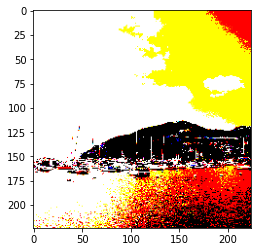

In [ ]:
plt.imshow(x[0])

In [ ]:

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)


In [ ]:

print("number of classes = ",predictions.size)
predictions
print("Highest probability ={maxpred:0.2f}% index class={ix}".format(maxpred=predictions.max()*100, ix=predictions.argmax()))


number of classes =  1000
Highest probability =57.04% index class=978


In [ ]:
# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=9)

In [ ]:

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" {} - {:10} = {:03.2f}% likelihood".format(imagenet_id, name, likelihood*100))

This is an image of:
 n09428293 - seashore   = 57.04% likelihood
 n09332890 - lakeside   = 29.23% likelihood
 n03216828 - dock       = 8.30% likelihood
 n02894605 - breakwater = 3.72% likelihood
 n09399592 - promontory = 0.59% likelihood
 n02981792 - catamaran  = 0.29% likelihood
 n09421951 - sandbar    = 0.13% likelihood
 n04483307 - trimaran   = 0.08% likelihood
 n03933933 - pier       = 0.07% likelihood


In [ ]:
predicted_classes

[[('n09428293', 'seashore', 0.57041615),
  ('n09332890', 'lakeside', 0.29226536),
  ('n03216828', 'dock', 0.08296384),
  ('n02894605', 'breakwater', 0.03721915),
  ('n09399592', 'promontory', 0.005918529),
  ('n02981792', 'catamaran', 0.0028773143),
  ('n09421951', 'sandbar', 0.0013341127),
  ('n04483307', 'trimaran', 0.00075422134),
  ('n03933933', 'pier', 0.00074326113)]]

# Adjust image data to model requirements

*So we need to lower resolution to 224x224 using image.load_img target_size()
so resnet50 can process it. Even SOTA image recognition models use low-res images as input because keeping the image sizes small limit the number of neurons and avoid practical issues for memory and processing when training.*

**We need to match the input size of the model i.e. from model.summary:**

Model: "resnet50"
_______________________________________________________________________________
Layer(type)         Output Shape                         Param #  Connected to                     
================================================================================
input_3(InputLayer)[(None, **224, 224**,  0                                             
_____________________________________________________________

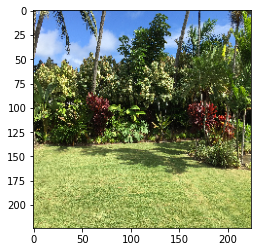

In [ ]:

img2 = image.load_img("sample_data/MRSL Backyard.JPG", target_size=(224,224))
plt.imshow(img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


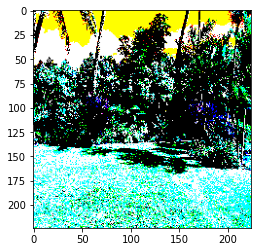

In [ ]:
# change our 2D image into a 3D array with 3rd dimension as color
x2 = image.img_to_array(img2)
# resnet50 assumes 4 dimensions - a list of 3 dim arrays
x2 = np.expand_dims(x2, axis=0)
# print(x2) with extra dimensions but pixel values still 0..255 (1 byte) RGB
# Scale the features and normalize the input to the expected range used in the trained network
x2 = resnet50.preprocess_input(x2)
plt.imshow(x2[0])


In [ ]:
predictions2 = model.predict(x2)
predictions2


array([[5.09772860e-07, 2.18704699e-05, 1.39632550e-06, 6.68283155e-06,
        1.66342181e-06, 1.24258404e-05, 4.93454763e-06, 1.22213591e-04,
        5.00185306e-05, 2.24314517e-05, 2.42181013e-05, 1.05280837e-04,
        3.57324345e-04, 2.89681120e-05, 2.85022950e-04, 4.97151690e-04,
        3.55483485e-06, 1.30078522e-04, 5.14047279e-04, 3.78719451e-05,
        1.24354960e-06, 4.69834886e-05, 1.54767058e-05, 2.77916377e-04,
        3.09130082e-05, 1.07504593e-05, 7.60768557e-07, 5.04992931e-06,
        1.86921363e-06, 8.03607236e-06, 5.07330697e-06, 2.52864311e-06,
        7.52543826e-07, 2.68205099e-06, 9.50046524e-06, 4.05328819e-06,
        2.73073783e-06, 8.89936382e-06, 1.79098970e-06, 8.27797514e-04,
        2.36896685e-05, 1.05184245e-05, 1.59640831e-06, 1.21741548e-04,
        1.04800656e-05, 1.08549699e-04, 1.93153719e-05, 5.75785771e-06,
        9.09897972e-06, 6.65020082e-07, 2.25405078e-04, 5.96300697e-06,
        1.47485446e-06, 6.92484207e-07, 9.79138258e-06, 1.428042

In [ ]:

print("number of classes = ",predictions2.size)

print("Highest probability ={maxpred:0.2f}% index class={ix}".format(maxpred=predictions2.max()*100, ix=predictions2.argmax()))

number of classes =  1000
Highest probability =32.91% index class=843


In [ ]:
# Look up the names of the predicted classes. Index zero is the results for the first image.
# default is top 5 matches but we specfiy
predicted_classes = resnet50.decode_predictions(predictions2, top=10)

In [ ]:
predicted_classes

[[('n04371774', 'swing', 0.32912317),
  ('n03930313', 'picket_fence', 0.21516664),
  ('n03899768', 'patio', 0.073381715),
  ('n03457902', 'greenhouse', 0.02009619),
  ('n03000134', 'chainlink_fence', 0.015226934),
  ('n03991062', 'pot', 0.015007885),
  ('n07753592', 'banana', 0.0126395635),
  ('n07730033', 'cardoon', 0.011371139),
  ('n12768682', 'buckeye', 0.010968685),
  ('n04485082', 'tripod', 0.0106363455)]]